In [21]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1: Analyze the trend in the number of global movie released on the Netflix platform from 2012 to 2021.

In [22]:
df=pd.read_csv('/content/drive/MyDrive/Spring Wan/Collecting Data/A5/netflix_titles.csv')## Read data

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
d1=df.release_year.value_counts()## Count the number of release_year
d1=d1.sort_index()[::-1][:10][::-1]
x=list(d1.index)## Set horizontal coordinate
x=list(map(str,x))## Convert to string type

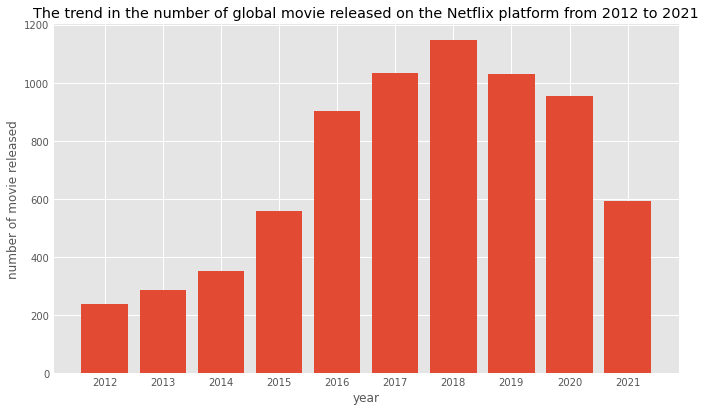

In [25]:
plt.figure(figsize=(10,6))
plt.bar(x,d1.values)## Draw bar chart
plt.xlabel('year')
plt.ylabel('number of movie released')
plt.title('The trend in the number of global movie released on the Netflix platform from 2012 to 2021')
plt.show()

Over the past decade (2012-2021), on the Netflix platform, global film releases have trended towards a general increase, with some fluctuations. From 2012 to 2018, the number of global film releases increased year by year, peaking at around 1,200 in 2018. Beginning in 2019, the number of global film releases trended downward. In 2021, the number of global film releases declined to only about 600 or so, a significant decline that can be attributed to the impact of the COVID-19 pandemic on the film industry, including production and distribution delays and the closure of movie theaters. This trend is likely to continue in the coming years.

Q2: Which countries are in the top 100 video released on the Netflix platform? In what years are most of them concentrated?

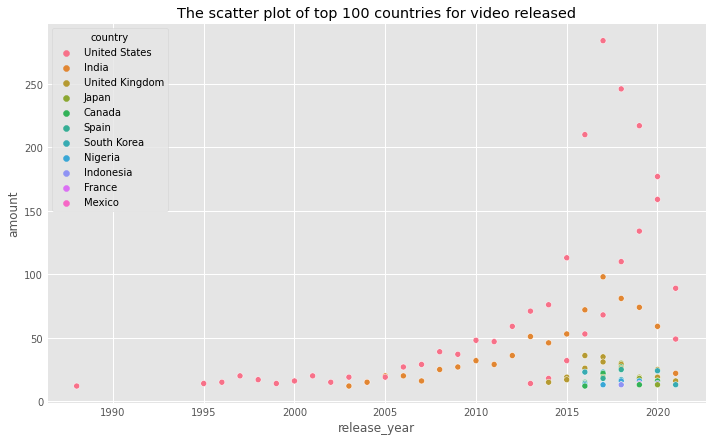

In [26]:
d2=pd.DataFrame(df.groupby(['release_year','type','country']).size()).reset_index()## Counting the number of each type, each year
d2=d2.reset_index(drop=True)## Reset the index
d2.columns=['release_year','type','country','amount']## Set columns

plt.figure(figsize=(10,6))
movie_df= d2.sort_values(by ='amount' , ascending=False)## Order by amount
movie_df_new=movie_df.head(100)## Retain the top 100 
ax=sns.scatterplot(movie_df_new['release_year'], movie_df_new['amount'], hue=movie_df_new['country'])## Draw a scatter plot
plt.tight_layout()
plt.title('The scatter plot of top 100 countries for video released')
plt.show()

The top 100 countries for video released are: United States, India, United Kingdom, Japan, Canada, Spain, South Korea, Nigeria, Indonesia, France, Mexico. They are mostly concentrated in the period 1995-2020. 

Q3: Analysis the trend of the U.S. film and television industry

In [9]:
d3=d2[d2['country']=='United States']## Retained data where the country is the United States

In [10]:
d3=d3.sort_values(by='release_year')## Order by year

In [11]:
d31=d3[d3['type']=='Movie']## Get the data of Movie type
d32=d3[d3['type']=='TV Show']## Get the data of TV Show type

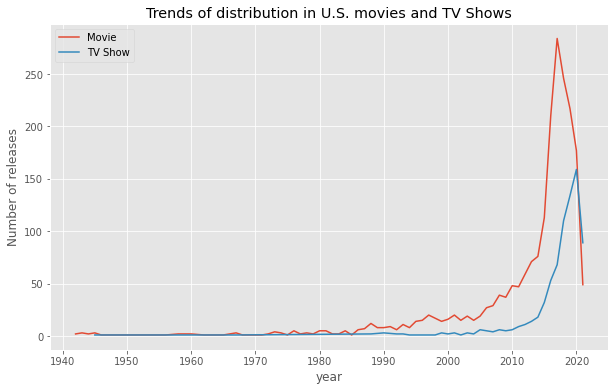

In [12]:
plt.figure(figsize=(10,6))
plt.plot(d31['release_year'],d31['amount'],label='Movie')## Draw line graph
plt.plot(d32['release_year'],d32['amount'],label='TV Show')## Draw line graph
plt.legend()## Show legend
plt.xlabel('year')
plt.ylabel('Number of releases')
plt.title('Trends of distribution in U.S. movies and TV Shows')
plt.show()

As we can easily see from the above graph, 2020 is a watershed year for the U.S. film and television industry. around 1940-2020, U.S. film distribution was generally on the rise. In the last decade (2010-2020), there has been a huge rise in the distribution of movies in the U.S. TV Shows and movies are on roughly the same trend. There are multiple reasons for this. Due to technological advances, the popularity of television and Internet viewing has allowed more viewers to watch more films and TV shows, broadening the audience's horizons. In addition, increased investment in many blockbusters has also contributed to the growth of film and TV distribution in the U.S., thus increasing the number of U.S. film and TV Show releases. after 2020, the distribution of U.S. films and TV Shows declined extremely rapidly, most notably due to the COVID-19 pandemic that caused great disruption to the U.S. film and TV industry.

Q4: What is the percentage of each type of video on the Netflix platform?

In [13]:
d4=d2.type.value_counts()## Count the number of each category

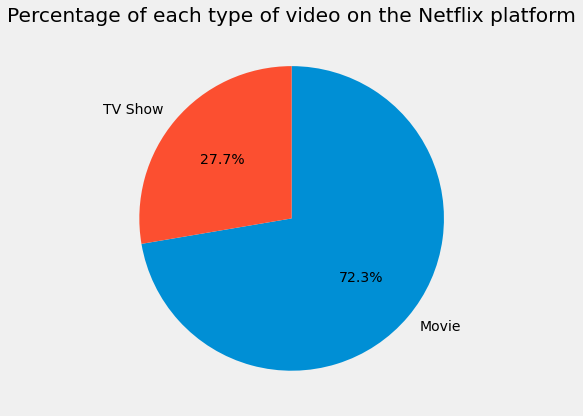

In [14]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
label =d4.index##Set label
val = d4.values## Set the value and count the percentage

plt.pie(val, labels=label, autopct='%1.1f%%', counterclock=False, startangle=90)## Draw pie chart
plt.title('Percentage of each type of video on the Netflix platform')
plt.tight_layout()
plt.show()

The movie is 72.3% of the Netflix platform, and TV Show is 27.7% of the Netflix platform. Movie is about 3 times more than TV Show.